# Lab 2 - Generalization

In this lab session, we will explore why generalization is crucial when designing our algorithms. We will also provide a quick introduction to the popular Scikit-Learn (Sklearn) library, which offers a wide range of implemented machine learning algorithms.

Specifically, we will cover the following topics:

1. load some dataset from the UCI machine learning Repository
2. Data preprocessing using SKlearn
3. Use the knn algorithm from SKlearn
4. Generalization and Hyperparameter Tuning
    - Train/Test Split
    - Cross-Validation
    - Bootstrapping

Material for the lab:  
1. Chapter 5 of the **"An Introduction to Statistical Learning"** book.

For additional information about the lab's structure, please refer to the course's [lab description file](https://github.com/olethrosdc/machine-learning-MSc/blob/main/lab.md).


# Import python libraries

In [298]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Load Dataset

![uci ml repo](./figures/UCI_repo.png)

The [**UCI machine learning repository**](https://archive.ics.uci.edu) is a valuable resource in the field of machine learning and data mining. It is maintained by the University of California, Irvine (UCI), and provides a vast collection of datasets that are frequently used for research, experimentation, and education in the machine learning community.


We will use the wine dataset, with our goal being to classify wines into three categories based on certain attributes. 


You can find more information about the dataset on the following [webpage](https://archive.ics.uci.edu/dataset/53/iris)

In [299]:
features =  ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

target = 'Class'

### load some data with pandas
        
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'        
dataset = pd.read_csv(csv_url, names= features + [target])
data_x = dataset[features]
data_y = dataset[[target]]

### lets have a quick look on our dataset
Our dataset consist of a set of different features together with a target category for classification

In [300]:
dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [301]:
data_x

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [302]:
data_y

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


lets see different information on our dataset

In [303]:
print("Shape of our dataset:", dataset.shape)
print("Number of features:", data_x.shape[1])
print("Number of labels:", data_y.shape[1])
print("Number of examples:", data_x.shape[0])

Shape of our dataset: (150, 5)
Number of features: 4
Number of labels: 1
Number of examples: 150


In [304]:
print("Number of different classes", len(data_y["Class"].unique()))
print("unique classes:", data_y["Class"].unique())

Number of different classes 3
unique classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [305]:
data_y["Class"].value_counts()

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Introduction to Scikit-Learn (Sklearn)

Scikit-Learn, often abbreviated as Sklearn, is a powerful and widely-used machine learning library in Python. It provides a comprehensive set of tools for various machine learning tasks, making it an excellent choice for both beginners and experienced data scientists.

#### Key Features of Scikit-Learn

Sklearn offers a plethora of features and benefits, including:

- **User-Friendly Interface**: Sklearn provides a simple and consistent API that makes it easy to implement machine learning algorithms.
  
- **Wide Range of Algorithms**: It includes a diverse collection of machine learning algorithms, such as regression, classification, clustering, dimensionality reduction, and more.
  
- **Efficient Data Preprocessing**: Sklearn offers robust data preprocessing capabilities, including data cleaning, scaling, encoding, and feature selection.

- **Model Evaluation**: It provides tools for model evaluation, including various metrics for classification and regression tasks.

# Data Preprocessing

In some machine learning algorithms, the scales of the features can have a substantial impact on the results. Consider the k-nearest neighbors (KNN) algorithm, where we calculate the Euclidean distance to find the k nearest neighbors. When features have varying scales, it can significantly affect the algorithm's performance. If we don't normalize our data and bring features to similar scales, the algorithm will put more weight to features with larger scales, potentially leading to biased outcomes. In our case, for example, our dataset contains features with different scales, such as "Sepal_Length" and "Petal_Width".

Scikit-Learn offers a range of preprocessing methods that enable us to modify our data and address issues related to feature scaling and other data preparation tasks.

The most common method to scale your dataset are listed bellow.
1. min-max scaling
    * $x_{scaled} = (x - min) / (max-min)$
    * $x_{scaled} \in [0,1]$
    * not good technique when you have outliers
    
    
2. standard scaling
   * $x_{scaled} = (x - mean) / std$
   * $mean(x_{scaled}) = 0$
   * $std(x_{scaled}) = 1$
   * robust to outliers

In [306]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler().fit(data_x[features])

norm_x = standard_scaler.transform(data_x[features]) 
# sklearn return a numpy so we can convert back to pandas
norm_x = pd.DataFrame(norm_x,columns=features)

In [307]:
norm_x

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


<Figure size 640x480 with 0 Axes>

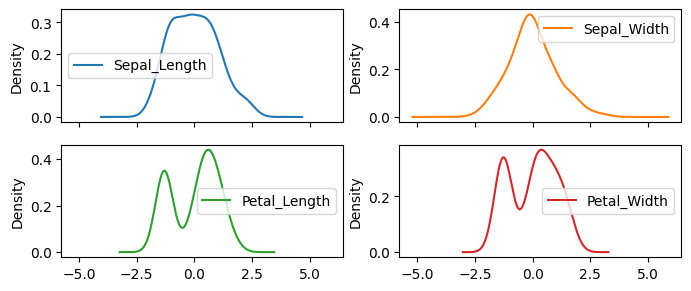

In [308]:
plt.figure()
norm_x[features].plot.density(subplots=True, 
                              layout=(7, 2),
                              figsize=(8,12),
                              sharex=True,
sharey=False)
plt.show()                              
plt.close()

In [309]:
norm_x[features].mean()

Sepal_Length   -4.736952e-16
Sepal_Width    -6.631732e-16
Petal_Length    3.315866e-16
Petal_Width    -2.842171e-16
dtype: float64

<Figure size 640x480 with 0 Axes>

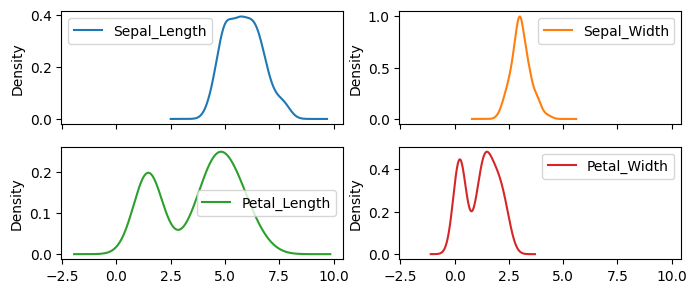

In [310]:
plt.figure()
dataset[features].plot.density(subplots=True, 
                              layout=(7, 2),
                              figsize=(8,12),
                              sharex=True,
sharey=False)
plt.show()                              
plt.close()

# Sklearn models API

[Sklearn](https://scikit-learn.org/stable/supervised_learning.html) user guide.

In [311]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=10)

In [312]:
# we can train our model using the fit method
model.fit(norm_x[features], data_y[target])

KNeighborsClassifier(n_neighbors=10)

In [313]:
# we can also make prediction on the dataset
model.predict(norm_x[features])

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [314]:
# we can get the predicted propabilities
model.predict_proba(norm_x[features])

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.7, 0.3

# Generalization

When developing a machine learning algorithm, the goal is not just to learn a model that good performance in our dataset. We want our model to be capable of generating accurate predictions for data it hasn't seen before. So we aim for our model to generalize well to upcoming data.
# Model Selection
In the process of model development, we often encounter various candidate models or different hyperparameter settings for our algorithms. For instance, in the k-nearest neighbors (KNN) algorithm, the choice of 'k' is a hyperparameter. Another hyperparameter is the distance metric used to calculate distances between data points. The collection of available candidates is typically referred to as the hypothesis space.

Therefore, when creating a model for a specific problem, our primary objective is typically to identify the model with the strongest generalization capabilities, the model that best explains future observations.

![Generalization](./figures/generalization.png)

# Choosing model based on the train data.

To demonstrate the problem of measuring the accuracy on the training set lets split our data in two different dataset.

1. **Development set**: the that we can use in order to produce our final model
2. **Testing set**: that we can use estimate the performance of our data in unseen data

We assume that during the training we don't have any access to the Testing set, so we can use it to select the best model.

In [315]:
from sklearn.model_selection import train_test_split

# Split our data into training and test set.
X_develop, X_test, y_develop, y_test = train_test_split(norm_x, data_y, test_size=0.3, random_state=4)

In [316]:
print("Train set size :", X_develop.shape)
print("Test set size :",  X_test.shape)

Train set size : (105, 4)
Test set size : (45, 4)


In [317]:
from sklearn.neighbors import KNeighborsClassifier
# train our model using the development set.
model = KNeighborsClassifier(n_neighbors=1) # Decision rule
model.fit(X_develop, y_develop[target])

KNeighborsClassifier(n_neighbors=1)

## Check the accuracy on train set

In [318]:
from sklearn.metrics import accuracy_score
# make prediction on the development set
prediction_train = model.predict(X_develop)

# measure the performance of the development set
train_score = accuracy_score(y_true = y_develop[target],
                             y_pred = prediction_train)
print(f"Accuracy Score: {train_score*100}%") # 100% accuracy because n=1, so the predicted value is the same as the true value

Accuracy Score: 100.0%


## Check the accuracy on Test set

In [319]:
# make prediction on the Test set
prediction_test = model.predict(X_test)

# measure the Accuracy on the Test set
train_score = accuracy_score(y_true = y_test[target],
                             y_pred = prediction_test)

print(f"Accuracy Score: {train_score*100}%")

Accuracy Score: 93.33333333333333%


We can observe that our model has different accuracy compared to the training and test sets.  
So there might be a better setting for k that could lead to better generalization.

We can do the same for every hyperparameter and illustrate the different on the performance.

In [320]:
different_k_settings = list(range(1, 70, 10))

In [321]:
different_k_settings

[1, 11, 21, 31, 41, 51, 61]

In [322]:
dev_results = {}
test_accuracy_results = {}
for k in different_k_settings:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_develop, y_develop[target])

    
    # get the prediction of the model on validation set
    prediction_train = model.predict(X_develop)
    dev_results[k] = accuracy_score(y_true = y_develop[target],
                                    y_pred = prediction_train)
    
    # get test
    prediction_test = model.predict(X_test)
    test_accuracy_results[k] = accuracy_score(y_true = y_test[target],
                                              y_pred = prediction_test)

Text(0, 0.5, 'Accuracy')

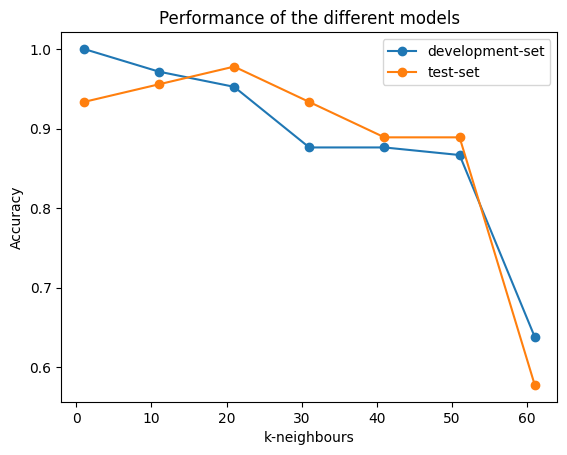

In [323]:
plt.plot(dev_results.keys(), dev_results.values(), marker='o', label ="development-set")


plt.plot(test_accuracy_results.keys(), test_accuracy_results.values(), marker='o', label ="test-set")

plt.legend()
plt.title("Performance of the different models")
plt.xlabel("k-neighbours")
plt.ylabel("Accuracy")

# Training / Validation / Testing  dataset

A very popular approach for model selection is to split our dataset in 3 different parts:

1. The *training* set, to train our different model in the hypothesis space
2. The *validation* set, to select the model with the best performance
3. The *testing* data set to measure the performance our final model

However, the performance of the final model is always limited by the different model class in our hypothesis space.

In [324]:
X_train, X_val, y_train, y_val = train_test_split(X_develop, y_develop, test_size=0.2, random_state=150)

In [325]:
train_accuracy_results = {}
val_accuracy_results = {}
for k in different_k_settings:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train[target])
    
    # get the prediction of the model on validation set
    prediction_train = model.predict(X_train)
    train_accuracy_results[k] = accuracy_score(y_true = y_train[target],
                                               y_pred = prediction_train)
    
    # get the prediction of the model on validation set
    prediction_val = model.predict(X_val)
    val_accuracy_results[k] = accuracy_score(y_true = y_val[target],
                                             y_pred = prediction_val)

Text(0, 0.5, 'Accuracy')

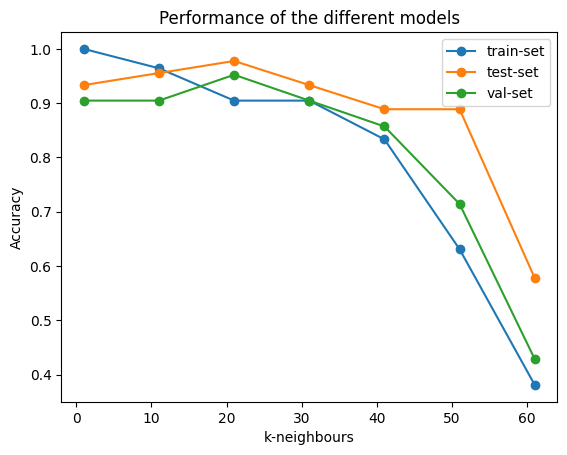

In [326]:
plt.plot(train_accuracy_results.keys(), train_accuracy_results.values(), marker='o', label ="train-set")

plt.plot(test_accuracy_results.keys(), test_accuracy_results.values(), marker='o', label ="test-set")

plt.plot(val_accuracy_results.keys(), val_accuracy_results.values(), marker='o', label ="val-set")


plt.legend()
plt.title("Performance of the different models")
plt.xlabel("k-neighbours")
plt.ylabel("Accuracy")

## Resampling methods for model selection

In practice partitioning the dataset into 3 different dataset requires a lot of records.
When our dataset has limited amount of points a good alternative is to use resampling methods for model selection.

Note that this method requires at least a training and test set.
Then we will apply Resampling techniques to select models using only training set.
After select the best model we will again use the test set to have an unbiased estimate about the model performance.

The most common techniques are:

1. **Cross validation** (most popular)
2. **Bootstrapping**

## A. Cross-Validation

One of the most popular cross-validation techniques is k-fold cross-validation.

In k-fold cross-validation, the training set is divided into k subsets, as illustrated below:

![Cross-Validation](./figures/kfold_cross_validation.png)

We then train a model k times using the following procedure:

1. For each of the k iterations:
   - Train the model using k-1 of the folds.
   - Evaluate the model on the held-out fold.

2. Average the performance metrics across the k evaluation sets.

3. Finally, select the model with the best average error.

4. Estimate the model's performance on the test set.

K-fold cross-validation is a widely used method for assessing a model's performance and making model selection decisions. It helps in achieving a more reliable estimate of a model's performance by using multiple subsets of the training data.


In [327]:
X_develop.shape

(105, 4)

In [328]:
from sklearn.model_selection import cross_val_score

number_of_folder = 20
cv_scores_list = []
for k in  different_k_settings:
    model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(estimator=KNeighborsClassifier(n_neighbors=k),
                                X=X_develop[features],
                                y=y_develop[target],
                                cv=number_of_folder)
    cv_scores_list += [cv_scores]

In [329]:
results = pd.DataFrame(cv_scores_list,
                       index = different_k_settings,
                       columns = [f"Acc@{cv}_fold" for cv in range(number_of_folder)])

In [330]:
results

,Acc@0_fold,Acc@1_fold,Acc@2_fold,Acc@3_fold,Acc@4_fold,Acc@5_fold,Acc@6_fold,Acc@7_fold,Acc@8_fold,Acc@9_fold,Acc@10_fold,Acc@11_fold,Acc@12_fold,Acc@13_fold,Acc@14_fold,Acc@15_fold,Acc@16_fold,Acc@17_fold,Acc@18_fold,Acc@19_fold
1,1.000000,0.833333,1.000000,0.833333,0.833333,1.0,0.6,1.0,1.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
11,1.000000,0.833333,1.000000,0.833333,0.833333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
21,1.000000,0.833333,1.000000,0.833333,0.833333,1.0,0.8,1.0,1.0,0.6,1.0,1.0,0.8,1.0,1.0,1.0,0.8,1.0,1.0,1.0
31,1.000000,0.833333,1.000000,0.833333,0.833333,0.8,0.8,1.0,1.0,0.8,1.0,0.8,0.8,0.8,1.0,1.0,0.6,1.0,1.0,0.8
41,1.000000,0.833333,1.000000,0.833333,0.666667,0.8,0.8,1.0,1.0,0.6,1.0,1.0,0.8,0.8,0.8,1.0,0.6,1.0,1.0,0.8
51,1.000000,0.833333,1.000000,0.833333,0.666667,0.8,0.8,1.0,1.0,0.8,1.0,1.0,0.8,0.8,0.8,1.0,0.4,1.0,1.0,0.8
61,0.833333,0.500000,0.666667,0.500000,0.500000,0.4,0.4,0.6,0.4,0.6,0.6,0.8,0.8,0.6,0.6,0.8,0.6,0.6,0.6,0.6


In [331]:
average_fold_performance = np.mean(results,axis=1)

Text(0, 0.5, 'Accuracy')

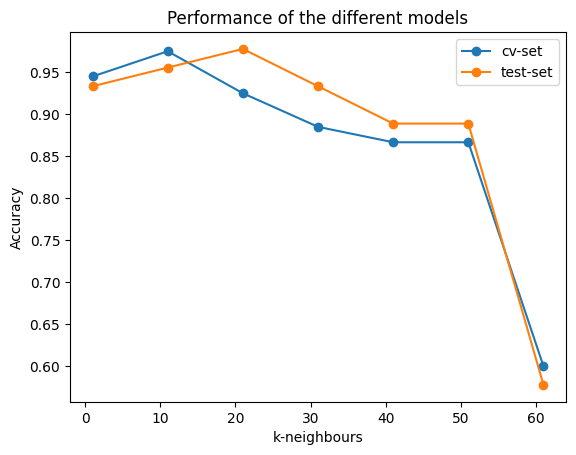

In [332]:
plt.plot(average_fold_performance.index, average_fold_performance.values, marker='o', label = "cv-set")


plt.plot(test_accuracy_results.keys(), test_accuracy_results.values(), marker='o', label ="test-set")

plt.legend()
plt.title("Performance of the different models")
plt.xlabel("k-neighbours")
plt.ylabel("Accuracy")

## B. Bootstrapping

Bootstrapping is an effective method for model selection, especially when dealing with a limited amount of data. In general, bootstrapping is a technique that employs sampling with replacement to estimate a quantity. In our case, we want to estimate the test error of different models and, ultimately, select the model with the lowest estimate.

Instead of using k distinct folds as in cross-validation, the bootstrap method generates training and validation sets by sampling from the dataset. Specifically, we sample with replacement to obtain *n* different data points, where "n" represents the original size of the dataset. Since we sample with replacement, our training set may contain duplicate points. The remaining dataset, which is not included in the training set, becomes the validation set, allowing us to calculate the error of our model. This process is repeated multiple times, and the results of validation errors are averaged to provide an estimate of our model's performance with the current hyperparameters.

To perform hyperparameter tuning using the bootstrap method, we can repeat the same procedure for each hyperparameter setting and select the setting with the lowest average bootstrap error.

![Bootstrap Model Selection](./figures/bootstrap.png)

**Algorithm:**

1. Sample *n* data points with replacement to create a training set (the bootstrap sample). 
   - This results in *n* different data points.
   - On average, bootstraps include 66% unique records, as some may be duplicates.
2. Use the remaining data points for the validation set.
    - This leaves 34% of the data for validation.
3. Train the model on the training set.

4. Evaluate the model on the validation set.

5. Repeat the process *B* times and calculate the average validation error scores.

6. Repeat the above steps for every hyperparameter setting.

7. Select the setting with the best performance.

$\lim_{n \to \infty} (1 - \frac{1}{n})^n = \frac{1}{e} \approx 0.368$

# Assignment - Bootstrap

In this assignment, you are asked to determine the best hyperparameter for the k-nearest neighbors (KNN) algorithm using the bootstrap method as described above.

**Assignment Steps:**

1. ✅ Create a function that generates B different bootstrap samples for both the training and validation sets, as described above.

2. ✅ Calculate the average validation loss for each different K setting (hyperparameter for KNN).

3. ✅ Select the model with the best average validation loss.

4. ✅ Create your final model by training the selected model with the best hyperparameter setting using the entire dataset.

5. ✅ Calculate the test error for your final model.

In [333]:
from typing import List, Tuple, Callable
import seaborn as sns

In [334]:
different_k_settings

[1, 11, 21, 31, 41, 51, 61]

In [335]:
class Bootstrap:
    def get_sample(
        data_x: pd.DataFrame, data_y: pd.DataFrame
    ) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
        """
        Get a random sample of the data and return the sample and the left over data.
        :param data_x: the data to sample
        :param data_y: the labels of the data
        :return: a sample of the data (that contain potentially multiple same rows) and the left over data
        """

        train_x = data_x.sample(frac=1.0, replace=True)
        train_y = data_y.loc[train_x.index]

        val_x = data_x.drop(train_x.index.unique())
        val_y = data_y.loc[val_x.index]

        return train_x, val_x, train_y, val_y

    def get_n_samples(
        data_x: pd.DataFrame, data_y: pd.DataFrame, B: int
    ) -> List[Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]]:
        """
        :param data_x: the features
        :param data_y: the labels
        :param B: the number of bootstrap samples
        :return: a list of bootstrap samples as a list of tuples (train_x, val_x, train_y, val_y)
        """
        results: List[
            Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]
        ] = []
        for _ in range(B):
            results.append(Bootstrap.get_sample(data_x, data_y))
        return results

    def get_validation_loss(
        k_settings: List[int],
        train_validation_samples: List[
            Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]
        ],
        model_initializer: Callable[[int], KNeighborsClassifier],
    ):
        """
        :param k_settings: list of k to test
        :param train_validation_samples: list of train-validation samples containing (train_x, val_x, train_y, val_y)
        :return: a matrix of size len(k_settings) x len(train_validation_samples) containing the validation loss for each k and each train-validation sample
        """
        accuracies = np.zeros((len(k_settings), len(train_validation_samples)))

        for k_index, k in enumerate(k_settings):
            for train_validation_sample_index, train_validation_sample in enumerate(
                train_validation_samples
            ):
                model = model_initializer(k)
                train_x, val_x, train_y, val_y = train_validation_sample
                model.fit(train_x, train_y[target])
                prediction_val = model.predict(val_x)
                accuracies[k_index][train_validation_sample_index] = accuracy_score(
                    y_true=val_y[target], y_pred=prediction_val
                )

        return accuracies

    def get_average_validation_loss_for_k(
        validation_loss: np.ndarray, k_settings: List[int]
    ) -> Tuple[np.ndarray, dict]:
        """
        :param validation_loss: a matrix of size len(k_settings) x len(train_validation_samples) containing the validation loss for each k and each train-validation sample
        :param k_settings: list of k to test
        :return: a dictionary containing the average validation loss (validation loss on every bootstrap data set) for each k
        """
        mean_validation_loss_for_k = np.mean(validation_loss, axis=1)
        assert len(mean_validation_loss_for_k) == len(k_settings)
        as_dict = {
            k_settings[i]: mean_validation_loss_for_k[i] for i in range(len(k_settings))
        }

        return mean_validation_loss_for_k, as_dict

    def select_best_k(average_loss_for_k: np.array, k_settings: List[int], model_initializer: Callable[[int], KNeighborsClassifier] = None):
        """
        :param average_loss_for_k: an array containing the average validation loss for each k, with the index corresponding to the index of k in k_settings
        :param k_settings: list of k to test
        :return: the best k (the one with the lowest average validation loss), and its index in k_settings
        """
        assert len(average_loss_for_k) == len(k_settings)
        argmin = np.argmax(average_loss_for_k)
        best_k = k_settings[argmin]
        best_model = model_initializer(best_k) if model_initializer else None

        return best_k, average_loss_for_k[argmin], best_model
    
    def compute_k_and_b_accuracies(
            B: np.ndarray,
            k_settings: List[int],
            X: pd.DataFrame,
            y: pd.DataFrame,
            model_initializer: Callable[[int], KNeighborsClassifier] = None,
        ) -> np.ndarray:
        """
        Compute the validation loss for each k and each train-validation sample of B and k
        :param B: list of B to test
        :param k_settings: list of k to test
        :param X: the features
        :param y: the labels
        :model_initializer: a function that takes a k as input and return a model
        :return: a matrix of size len(B) x len(k_settings) containing the validation loss for each k and each train-validation sample
        """
        accuracies = np.zeros((len(B), len(k_settings)))

        for i, b in enumerate(B):
            train_validation_samples = Bootstrap.get_n_samples(X, y, b)
            validation_loss = Bootstrap.get_validation_loss(k_settings, train_validation_samples, model_initializer)
            average_loss_for_k, _ = Bootstrap.get_average_validation_loss_for_k(validation_loss, k_settings)
            accuracies[i] = average_loss_for_k

        return accuracies
    
    def plot_k_b_heatmap(accuracies: np.ndarray, k_settings: List[int], B: np.ndarray):
        """
        Plot a heatmap of the validation loss for each k and each train-validation sample of B and k
        :param accuracies: a matrix of size len(B) x len(k_settings) containing the validation loss for each k and each train-validation sample
        :param k_settings: list of k to test
        :param B: list of B to test
        """
        plt.figure(figsize=(20,20))
        sns.heatmap(accuracies, xticklabels=k_settings, yticklabels=B, annot=True, fmt=".3f", cmap="YlGnBu")
        plt.xlabel("k")
        plt.ylabel("B")
        plt.show()

    def select_best_b_k_pair(accuracies: np.ndarray, k_settings: List[int], B: np.ndarray) -> Tuple[int, int, float]:
        """
        Select the best b and k pair (the one with the highest accuracy)
        :param accuracies: a matrix of size len(B) x len(k_settings) containing the validation loss for each k and each train-validation
        :param k_settings: list of k to test
        :param B: list of B to test
        :return: the best b, the best k, and the average validation loss of the best b and k pair
        """
        best_model_b_k = np.unravel_index(np.argmax(accuracies, axis=None), accuracies.shape)
        best_b_index, best_k_index = best_model_b_k
        return B[best_b_index], k_settings[best_k_index], accuracies[best_b_index][best_k_index]

In [336]:
model_initializer = lambda k: KNeighborsClassifier(n_neighbors=k)

In [337]:
X = dataset[features]
y = dataset[[target]]

In [338]:
X

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [339]:
y

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [340]:
len(Bootstrap.get_sample(X, y))

4

In [341]:
train_validation_samples = Bootstrap.get_n_samples(X, y, 5)
np.mean([len(tvd[1]) / len(X) for tvd in train_validation_samples]) # Should be around 0.35

0.37466666666666665

In [342]:
validation_loss = Bootstrap.get_validation_loss(different_k_settings, train_validation_samples, model_initializer)
validation_loss

array([[0.94827586, 0.91525424, 0.96428571, 0.96      , 0.94827586],
       [0.93103448, 0.91525424, 0.98214286, 0.96      , 0.93103448],
       [0.94827586, 0.89830508, 0.98214286, 0.9       , 0.94827586],
       [0.89655172, 0.88135593, 0.98214286, 0.88      , 0.93103448],
       [0.89655172, 0.86440678, 0.98214286, 0.86      , 0.93103448],
       [0.87931034, 0.86440678, 0.98214286, 0.86      , 0.9137931 ],
       [0.87931034, 0.86440678, 0.92857143, 0.84      , 0.89655172]])

In [343]:
average_loss_for_k, average_loss_for_k_as_dict = Bootstrap.get_average_validation_loss_for_k(validation_loss, different_k_settings)
average_loss_for_k_as_dict

{1: 0.9472183351423562,
 11: 0.9438932119896469,
 21: 0.9353999332053101,
 31: 0.9142169992485597,
 41: 0.9068271687400852,
 51: 0.8999306170159473,
 61: 0.8817680554395924}

In [344]:
best_k_index, score_for_k, best_model = Bootstrap.select_best_k(average_loss_for_k, different_k_settings, model_initializer)
best_k_index, score_for_k, best_model

(1, 0.9472183351423562, KNeighborsClassifier(n_neighbors=1))

In [345]:
best_model = best_model.fit(X, y[target])
accuracy_score(y_true=y_test[target], y_pred=best_model.predict(X_test))

0.4666666666666667

## Finding the best (B, k) combination

In [346]:
B = np.arange(1, 30, 1, dtype=int)
accuracies_k_b = Bootstrap.compute_k_and_b_accuracies(B, different_k_settings, X, y, model_initializer)
accuracies_k_b

array([[0.9375    , 1.        , 1.        , 0.95833333, 0.9375    ,
        0.91666667, 0.91666667],
       [0.98176393, 0.97214854, 0.96253316, 0.97214854, 0.95391247,
        0.95391247, 0.9346817 ],
       [0.96207714, 0.96149357, 0.96149357, 0.94925663, 0.93689399,
        0.93081592, 0.92427997],
       [0.96132222, 0.97002623, 0.9533119 , 0.94007299, 0.92713169,
        0.90957217, 0.88815386],
       [0.94701503, 0.94036764, 0.93979834, 0.93303622, 0.9226309 ,
        0.91549225, 0.90857816],
       [0.95287976, 0.96508353, 0.94975719, 0.94975719, 0.94058372,
        0.94699398, 0.88902486],
       [0.96875074, 0.95520664, 0.95300012, 0.94749251, 0.94473777,
        0.93422253, 0.92609689],
       [0.94936066, 0.97536269, 0.97776653, 0.95708502, 0.95908063,
        0.93393556, 0.92672402],
       [0.95791251, 0.95943345, 0.96145365, 0.95520952, 0.9482993 ,
        0.93008845, 0.91366916],
       [0.95635257, 0.96904121, 0.97460051, 0.95642321, 0.94710693,
        0.93257939, 0.9

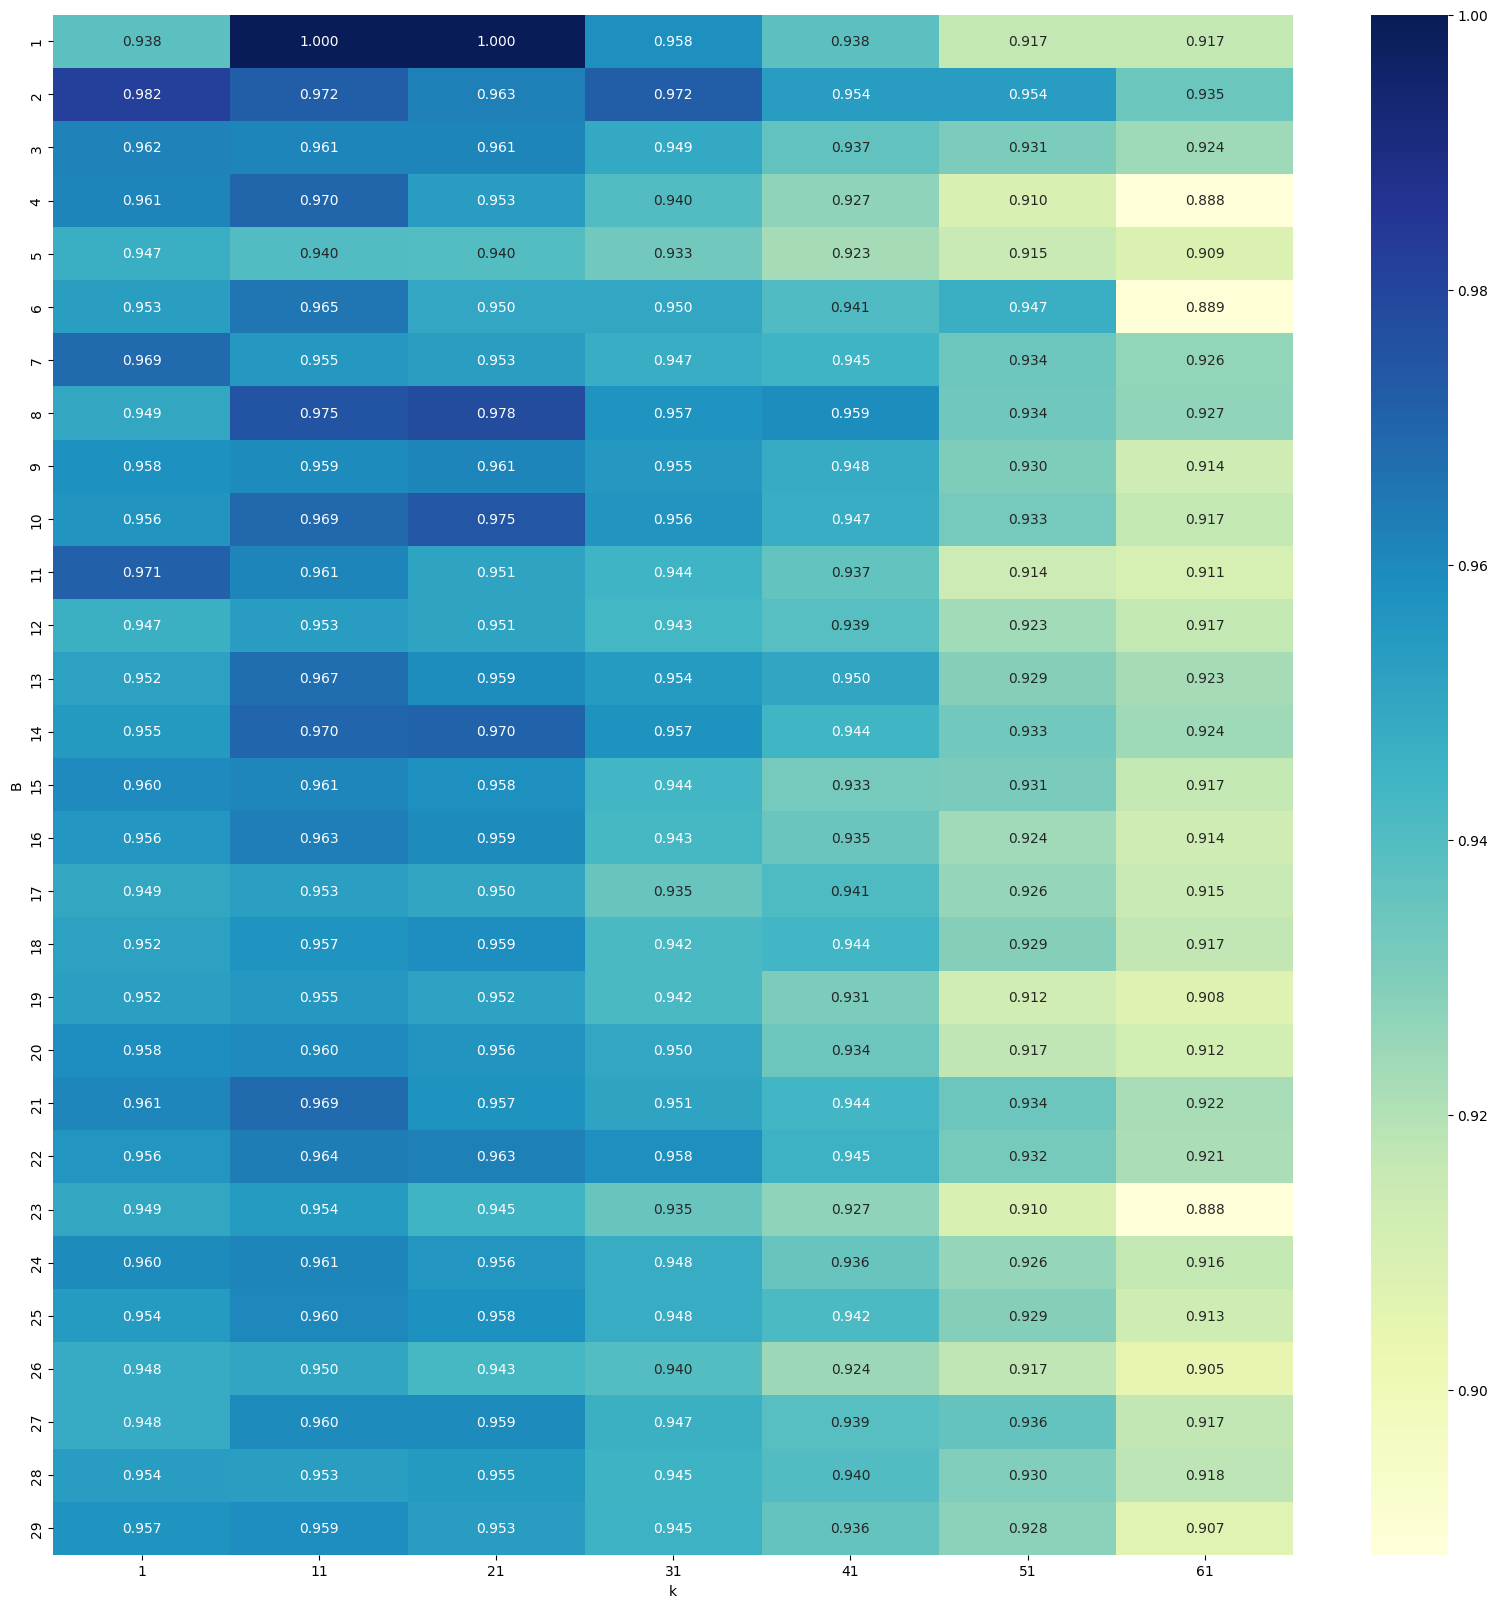

In [347]:
Bootstrap.plot_k_b_heatmap(accuracies_k_b, different_k_settings, B)

In [348]:
best_b, best_k, accuracies_k_b = Bootstrap.select_best_b_k_pair(accuracies_k_b, different_k_settings, B)
print(f"Best B: {best_b}")
print(f"Best k: {best_k}")
print(f"Best accuracy: {accuracies_k_b}")

Best B: 1
Best k: 11
Best accuracy: 1.0
